# Animal Bites Presentation

## 1.0 Introduction

    Animal bites pose a significant public health challenge. According to a report from the World Health Organization's "Media Center" dated January 12, 2024, an estimated 4.5 million people in the United States are bitten by dogs yearly, resulting in approximately 66,000 emergency room visits annually due to cat bites.
    
    The impact of these bites varies based on several factors, including the type of animal involved, the animal's vaccination status, and the location of the bite on the victim's body. These variables influence the appropriate treatment required for each bite incident.
This report evaluates the policies addressing animal bites in the United States, utilizing a Kaggle dataset comprising 9,000 entries. Our analysis aims to answer the following questions:

    •	Which states are most affected by bites?
    •	Are there trends over time?
    •	Which animals are most often responsible for bites?
    •	Where do most bites occur on the body?
    •	Are most biting animals vaccinated?
    •	What happens after a bite? (Quarantine, lab testing, animal disposal)



### bite_date: The date the bite occurred
### SpeciesIDDesc: The species of animal that did the biting
### BreedIDDesc: Breed (if known)
### GenderIDDesc: Gender (of the animal)
### color: color of the animal
### vaccination_yrs: how many years had passed since the last vaccination
### vaccination_date: the date of the last vaccination
### victim_zip: the zipcode of the victim
### AdvIssuedYNDesc: whether advice was issued
### WhereBittenIDDesc: Where on the body the victim was bitten
### quarantine_date: whether the animal was quarantined
### DispositionIDDesc: whether the animal was released from quarantine
### head_sent_date: the date the animal’s head was sent to the lab
### release_date: the date the animal was released
### ResultsIDDesc: results from lab tests (for rabies)

## 2.0 Import common libraries

In [1]:
# Code task 1#
# Import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim 
from opencage.geocoder import OpenCageGeocode
from uszipcode import SearchEngine
import folium
import calendar
import datetime

## 3.0 Functions used for this Analysis

In [2]:
# Initialize the search engine
search = SearchEngine()

# Code task 2#
# Function to get state and city
def get_state_city(zip_code):
    zipcode = search.by_zipcode(zip_code)
    if zipcode:
        return zipcode.state, zipcode.major_city
    else: 
        return None, None

# Code task 3#
# Function to draw a histogram
def bar_graph(x, y, xlabel, ylabel,title):
    sns.barplot(x=x,y=y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

## 4.0 Import the Data

In [3]:
#Code task 4#
#Import the dataset
date_columns = ['bite_date', 'head_sent_date','release_date','vaccination_date']
animal_bites = pd.read_csv("Health_AnimalBites.csv", parse_dates=date_columns)

#Code task 5#
#Check on the columns of the dataframe by using the info() method
animal_bites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   bite_date          8686 non-null   object        
 1   SpeciesIDDesc      8885 non-null   object        
 2   BreedIDDesc        3759 non-null   object        
 3   GenderIDDesc       6477 non-null   object        
 4   color              6426 non-null   object        
 5   vaccination_yrs    3738 non-null   float64       
 6   vaccination_date   4115 non-null   datetime64[ns]
 7   victim_zip         7165 non-null   object        
 8   AdvIssuedYNDesc    2565 non-null   object        
 9   WhereBittenIDDesc  8387 non-null   object        
 10  quarantine_date    2020 non-null   object        
 11  DispositionIDDesc  1535 non-null   object        
 12  head_sent_date     395 non-null    datetime64[ns]
 13  release_date       1445 non-null   datetime64[ns]
 14  ResultsI

In [4]:
# Code task 6#
#Convert the 'bite_date' column to dtype=datetime format, assigning the value NaT to any missing values
animal_bites['bite_date'] = pd.to_datetime(animal_bites['bite_date'], errors='coerce')

# Code task 7#
# Check on the modification
animal_bites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   bite_date          8685 non-null   datetime64[ns]
 1   SpeciesIDDesc      8885 non-null   object        
 2   BreedIDDesc        3759 non-null   object        
 3   GenderIDDesc       6477 non-null   object        
 4   color              6426 non-null   object        
 5   vaccination_yrs    3738 non-null   float64       
 6   vaccination_date   4115 non-null   datetime64[ns]
 7   victim_zip         7165 non-null   object        
 8   AdvIssuedYNDesc    2565 non-null   object        
 9   WhereBittenIDDesc  8387 non-null   object        
 10  quarantine_date    2020 non-null   object        
 11  DispositionIDDesc  1535 non-null   object        
 12  head_sent_date     395 non-null    datetime64[ns]
 13  release_date       1445 non-null   datetime64[ns]
 14  ResultsI

The Dataset is made of 15 columns and contains 9003 rows of information.  

In [5]:
#Code task 8#
#Visualize the head of the dataset 
animal_bites.head().T

,0,1,2,3,4
bite_date,1985-05-05 00:00:00,1986-02-12 00:00:00,1987-05-07 00:00:00,1988-10-02 00:00:00,1989-08-29 00:00:00
SpeciesIDDesc,DOG,DOG,DOG,DOG,DOG
BreedIDDesc,NaN,NaN,NaN,NaN,NaN
GenderIDDesc,FEMALE,UNKNOWN,UNKNOWN,MALE,FEMALE
color,LIG. BROWN,BRO & BLA,NaN,BLA & BRO,BLK-WHT
vaccination_yrs,1.0,NaN,NaN,NaN,NaN
vaccination_date,1985-06-20 00:00:00,NaT,NaT,NaT,NaT
victim_zip,40229,40218,40219,NaN,NaN
AdvIssuedYNDesc,NO,NO,NO,NO,NO
WhereBittenIDDesc,BODY,BODY,BODY,BODY,BODY


## 5.0 Data Wrangling

### 5.1 Number of Missing values by columns

In [6]:
#Code task 9# 
#Count the number of missing values by columns
missing_values =  pd.concat([animal_bites.isna().sum(), 100*animal_bites.isna().mean()], axis=1)

#Code task 10#
#Attribute a name to the columns
missing_values.columns = ['Count', '%']

#Code task 11#
#Display the DataFrame in descending order of the %
missing_values.sort_values(by='%',ascending=False)

,Count,%
head_sent_date,8608,95.612574
release_date,7558,83.949795
DispositionIDDesc,7468,82.950128
ResultsIDDesc,7460,82.861268
quarantine_date,6983,77.563035
AdvIssuedYNDesc,6438,71.509497
vaccination_yrs,5265,58.480506
BreedIDDesc,5244,58.247251
vaccination_date,4888,54.293013
color,2577,28.623792


The data is not tidy with a lot of missing values. The reasons for these missing values are unclear now. Yet, their number suggests they may follow certain patterns.

## 6.0 Explore The Data

### 6.1 Which states are most affected by bites?

In which geographic area did the bites occur?

We have the zip codes of the victims that allow us to locate:
- the state: the 1st digit of the zip code
- the city: the two digits that follow
- the blocks of the city: the last two digits
where the bites occurred.

We will use the get_state_city function to do such a search on the location of each of the victims

In [7]:
# Code task 12#
# Apply get_state_city to get state and city
animal_bites['state_city'] = animal_bites['victim_zip'].apply(get_state_city) # Add a new column containing a tuple (State, City)

# Code task 13#
# Split the tuple into two separate columns "State" and "City" 
animal_bites[['state','city']] = pd.DataFrame(animal_bites['state_city'].tolist(), index=animal_bites.index)
filtered_animal_bites = animal_bites.dropna(subset=['state','city'])

Text(0.5, 1.0, 'Number of Animal bites count by State')

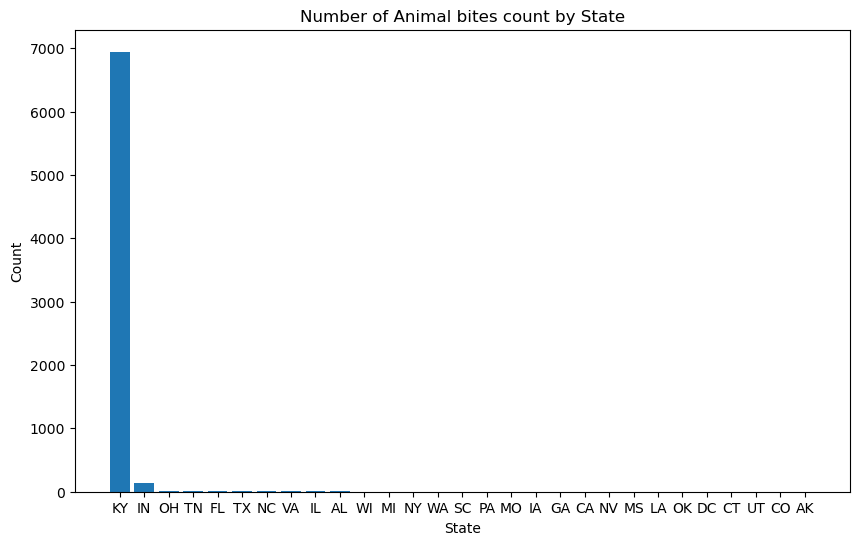

In [8]:
# Code task 14#
# Group the Dataset by 'state' and 'city'
animal_bites_location = filtered_animal_bites.groupby(['state']).size().reset_index(name='count')
sorted_animal_bites_location = animal_bites_location.sort_values(by='count',ascending=False)
sorted_animal_bites_location

# Code task 15#
# Generate the histogram
plt.figure(figsize=(10,6))
plt.bar(sorted_animal_bites_location['state'],sorted_animal_bites_location['count'])
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Number of Animal bites count by State')

##### Animal bites are very localized in two states: Kentucky and Indiana and much more on the Kentucky side.
##### Let's take a closer look at the first 5 states affected by the phenomenon.

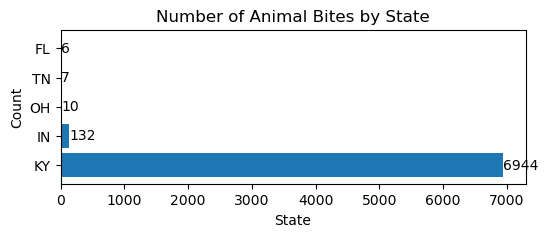

In [9]:
# Code task 16#
# Define the top 5 countries concerned by animal bites
top_five_location_animal_bites = sorted_animal_bites_location.head(5)

# Code task 17#
# Generate the histogram
plt.figure(figsize=(6, 2))
barplot = plt.barh(top_five_location_animal_bites['state'], top_five_location_animal_bites['count'])

# Add the number related at the top of each bar
for index, bar in enumerate(barplot):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', va='center', ha='left', color='black')

plt.xlabel('State')
plt.ylabel('Count')
plt.title('Number of Animal Bites by State')
plt.show()

### 6.2 Are there trends over time?

#### 6.2.1 How are animal bites distributed over the years?

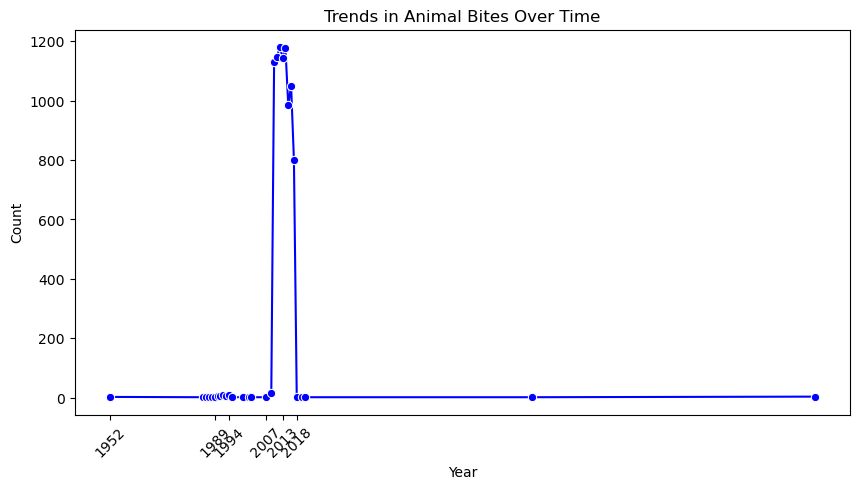

In [10]:
# Code task 18#
# Extract year from 'bite_date
animal_bites['year'] = animal_bites['bite_date'].dt.year

# Code task 19#
# Group by year and count the number of incidents
bites_by_year = animal_bites.groupby(['year']).size().reset_index(name='count')

# Code task 20#
# Create the line plot
plt.figure(figsize=(10,5))
sns.lineplot(x=bites_by_year['year'], y=bites_by_year['count'], marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Trends in Animal Bites Over Time')
plt.grid(False)

# Display the different values of 'year' on the x-axis 
plt.xticks(bites_by_year['year'][::5], rotation=45)
plt.show()

 ##### Animal bites have increased sharply since 2008, peaking in 2013. Since then, a downward trend has been observed. This phenomenon appears absent during the period from 1994 to 2007. However, it is unlikely that no animal bites occurred during this time. The lack of recorded information seems to be due more to the unavailability of data for this period than to an actual absence of the phenomenon.

#### 6.2.2 How are animal bites distributed over months?

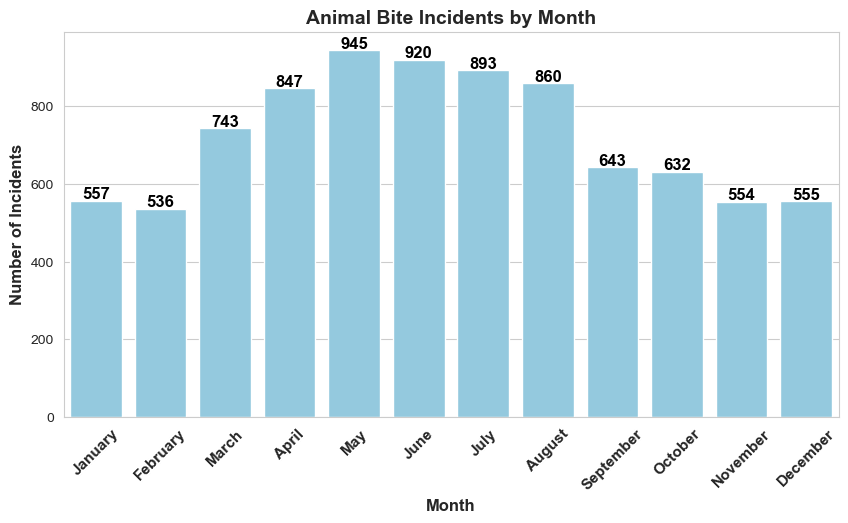

In [11]:
# Code task 21#
# Insert a new column 'month' in the DataFrame
animal_bites['month'] = animal_bites['bite_date'].dt.month

# Code task 22#
# Group by month and count the number of incidents per month
bites_by_month = animal_bites.groupby(['month']).size().reset_index(name='count')

# Code task 23#
# Ensure the 'month' column is of integer type 
bites_by_month['month'] = bites_by_month['month'].astype(int)

# Code task 24#
# Replace the month numbers with month names 
bites_by_month['month_name'] = bites_by_month['month'].apply(lambda x: calendar.month_name[x])

# Code task 25#
# Create the bar chart with a single color
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
barplot = sns.barplot(x=bites_by_month['month_name'], y=bites_by_month['count'], color="skyblue")

# Add the number related at the top of each bar
for index, row in bites_by_month.iterrows():
    barplot.text(index, row['count'] + 5, str(row['count']), color='black', ha="center", fontsize=12, fontweight='bold')

# Customize labels and title
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Number of Incidents', fontsize=12, fontweight='bold')
plt.title('Animal Bite Incidents by Month', fontsize=14, fontweight='bold')

# Improve x-axis readability
plt.xticks(rotation=45, fontsize=11, fontweight='bold')

# Show the plot
plt.show()


##### Animal bites occur throughout the year. However, the number of bites tends to increase from March to reach its highest values during May, June, and July. This period of the year corresponds to the period of increase in temperature which favors outdoor activities. More outdoor activities lead to more contact with animals and therefore more risk of bites.

#### 6.2.3 Is there a day of the week when people are more exposed to animal bites?

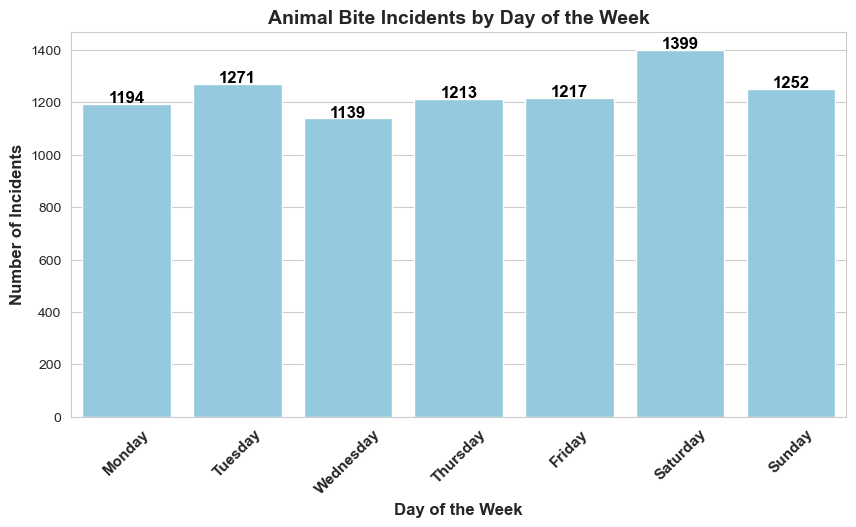

In [12]:
# Code task 26#
# Insert a column 'day' in the DataFrame
animal_bites['day'] = animal_bites['bite_date'].dt.dayofweek

# Code task 27#
# Drop missing values for the new column
animal_bites = animal_bites.dropna(subset=['day'])

# Code task 28#
# Ensure the 'day' column is of integer type 
animal_bites['day'] = animal_bites['day'].astype(int)

# Code task 29#
# Convert the day of the week to day names 
animal_bites['day_name'] = animal_bites['day'].apply(lambda x: calendar.day_name[x])

#Code task 30#
# Define the order of the days of the week 
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] 

# Code task 31#
# Convert 'day_name' to a categorical type with the specified order 
animal_bites['day_name'] = pd.Categorical(animal_bites['day_name'], categories=day_order, ordered=True)

# Code task 32#
# Group by 'day_name' and count the number of incidents per day of the week
bites_by_day = animal_bites.groupby(['day_name']).size().reset_index(name='count')

# Code task 33#
# Create the bar chart with a single color (without palette)
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
barplot = sns.barplot(x=bites_by_day['day_name'], y=bites_by_day['count'], color="skyblue")  

# Add the number related at the top of each bar
for index, row in bites_by_day.iterrows():
    barplot.text(index, row['count'] + 5, str(row['count']), color='black', ha="center", fontsize=12, fontweight='bold')

# Customize labels and title
plt.xlabel('Day of the Week', fontsize=12, fontweight='bold')
plt.ylabel('Number of Incidents', fontsize=12, fontweight='bold')
plt.title('Animal Bite Incidents by Day of the Week', fontsize=14, fontweight='bold')

# Improve x-axis readability
plt.xticks(rotation=45, fontsize=11, fontweight='bold')

# Show the plot
plt.show()

##### Animal bites are more common on Saturdays than any other day.

#### 6.2.4 Is there a relationship between the dates of bites and the last vaccination dates of the animals involved in the bites?

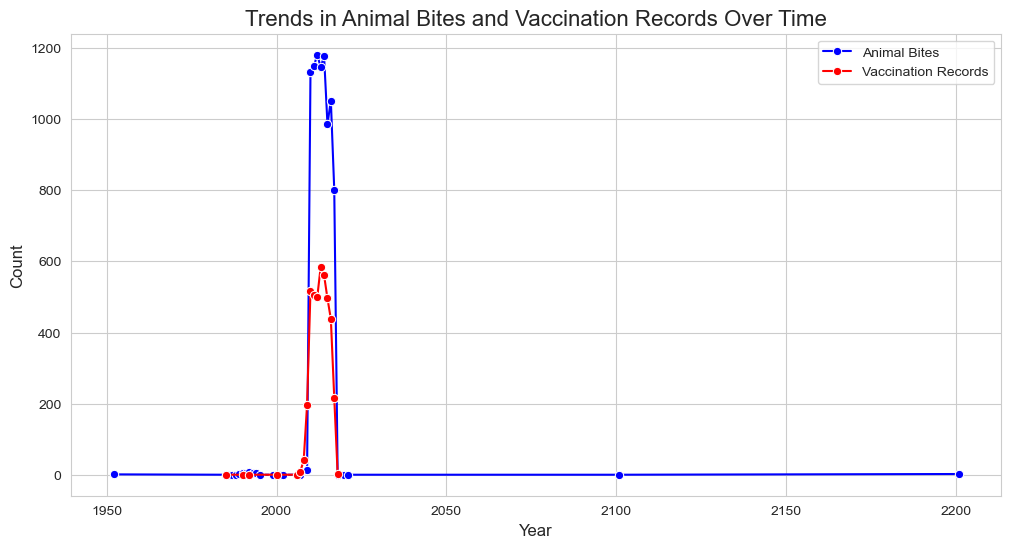

In [13]:
# Code task 35#
# Group vaccination dates and bite dates by year for comparison
vaccination_by_year = animal_bites['vaccination_date'].dropna()
vaccination_by_year = pd.to_datetime(vaccination_by_year, errors='coerce').dt.year.value_counts().sort_index()

bites_by_year = animal_bites['bite_date'].dropna()
bites_by_year = pd.to_datetime(bites_by_year, errors='coerce').dt.year.value_counts().sort_index()

# Code task 36#
# Create a combined plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=bites_by_year.index, y=bites_by_year.values, label='Animal Bites', marker='o', color='blue')
sns.lineplot(x=vaccination_by_year.index, y=vaccination_by_year.values, label='Vaccination Records', marker='o', color='red')
plt.title('Trends in Animal Bites and Vaccination Records Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


##### The graph shows a strong correlation between the number of animal bites and the number of vaccinated animals.
##### It is crucial to remember that correlation does not imply causation. However, this strong correlation suggests that this parameter could be valuable for integration into a machine-learning model to predict animal bites

In [14]:
# Code task 37#
# Percentage of vaccinated animals involved in bites
number = animal_bites.vaccination_date.count()
percent = round(100* animal_bites.vaccination_date.count() / animal_bites.bite_date.count(),2)
(number, percent)

(4075, 46.92)

##### Only 47% (less than 50%) of animal bites involve vaccinated animals. This confirms that vaccination is not the cause of animal bites.

#### 6.2.5 what period after the administration of the vaccines the bites occurred

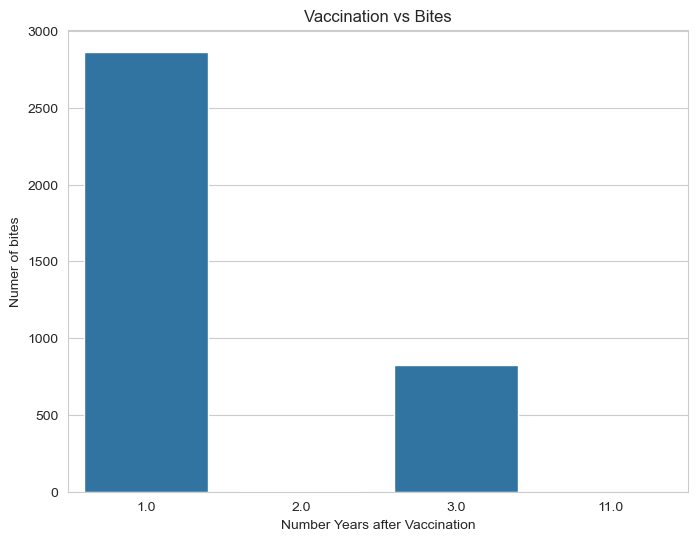

In [15]:
# Code task 38#
# Count the number of observation by year after vaccination
bites_by_vacc_year = animal_bites.groupby('vaccination_yrs').size().reset_index(name='count')

plt.figure(figsize=(8,6))
sns.barplot(x= bites_by_vacc_year['vaccination_yrs'] , y= bites_by_vacc_year['count'])
plt.xlabel('Number Years after Vaccination')
plt.ylabel('Numer of bites')
plt.title('Vaccination vs Bites')
plt.show()


##### Among vaccinated animals, those with one year of vaccination are the most involved in bite cases (77,40%)

In [16]:
bites_by_vacc_year

,vaccination_yrs,count
0,1.0,2865
1,2.0,6
2,3.0,828
3,11.0,1


### 6.3  Which animals are most often responsible for bites?

#### 6.3.1

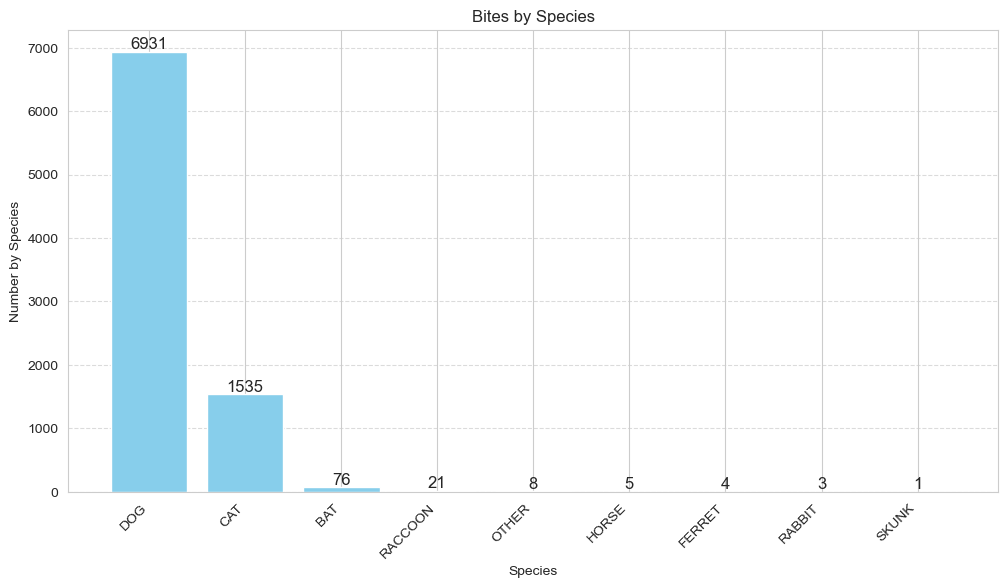

In [17]:
# Code task 39#
# Group by species and count occurrences
bites_by_species = animal_bites.groupby(['SpeciesIDDesc']).size().reset_index(name='Count')

# Code task 40#
# Sort species by count in descending order
bites_by_species_sorted = bites_by_species.sort_values(by='Count', ascending=False)

# Code task 41#
# Create the bar chart
plt.figure(figsize=(12,6))
bars = plt.bar(bites_by_species_sorted.SpeciesIDDesc, bites_by_species_sorted.Count, color='skyblue')

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

# Customize plot labels and title
plt.xlabel('Species')
plt.ylabel('Number by Species')
plt.title('Bites by Species')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


Dogs dominate the list of animals that inflict the most bites, followed by cats, bats and raccoons.
We will focus only on these species in the rest of the document

### 6.3.2 Animal bites by specy and by gender

In [18]:
#Code task 42#
#count the number of occurrences of each unique value
counts =animal_bites[['SpeciesIDDesc','GenderIDDesc']].fillna('Not_Mentionned').value_counts()#Identify the missing values by 'Not_Mentionned'

#Code task 43#
#Reshape the result for better readability
counts_unstacked = counts.unstack(fill_value=0)
counts_unstacked['Total'] = counts_unstacked['FEMALE']+counts_unstacked['MALE']+counts_unstacked['UNKNOWN']+counts_unstacked['Not_Mentionned']
print(counts_unstacked.sort_values(by='Total', ascending=False))

GenderIDDesc    FEMALE  MALE  Not_Mentionned  UNKNOWN  Total
SpeciesIDDesc                                               
DOG               1582  3278            1614      457   6931
CAT                407   514             472      142   1535
Not_Mentionned       2     1              96        2    101
BAT                  0     0              62       14     76
RACCOON              0     0              19        2     21
OTHER                0     0               5        3      8
HORSE                1     1               3        0      5
FERRET               1     0               3        0      4
RABBIT               0     0               3        0      3
SKUNK                0     1               0        0      1


##### The following table leads to the following conclusions and/or hypotheses:
##### - Males in almost all species are most involved in animal bites
##### - The presence of 'UNKNOWN' in the animal genus column suggests that some bites in the case of dogs and cats were made by animals that did not belong to the victim. It is perplexing to think that an owner of a domestic animal, such as a dog or cat, might not know the gender of their pet.
##### - The data entry system will need to be analyzed to make sense of the missing values ('Not_Mentionned') in the genre for almost all species

### 6.3.3 Bites by Breed

We consider the cases of dogs and cats successively.

#### 6.3.3-1 Dogs bites by breed

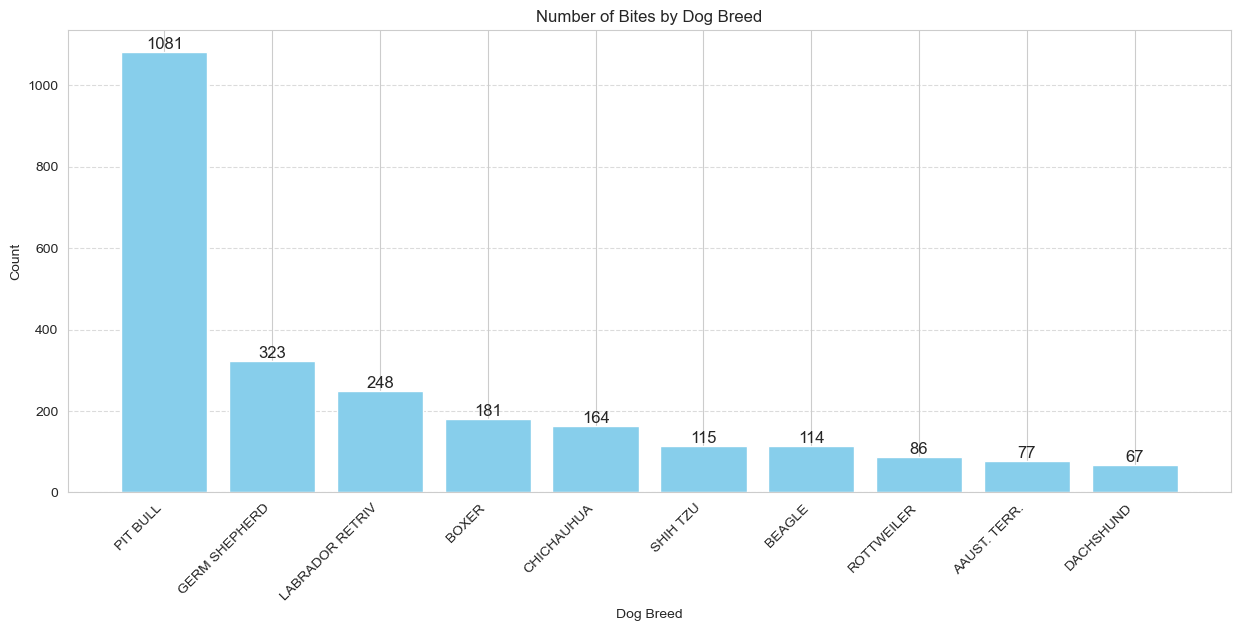

In [19]:
# Code task 44#
# Filter data for dog bites
bites_by_dog = animal_bites[animal_bites['SpeciesIDDesc']=='DOG']

# Code task 45#
# Group by breed and count occurrences
bites_by_dog_breed = bites_by_dog.groupby(['BreedIDDesc']).size().reset_index(name='Count')

# Code task 46#
# Sort the new DataFrame
bites_by_dog_breed_sorted = bites_by_dog_breed.sort_values(by='Count', ascending=False)

# Code task 47#
# Select top 10 breeds
top_dog_breeds = bites_by_dog_breed_sorted.head(10)

# Code task 48#
# Create the bar chart
plt.figure(figsize=(15,6))
bars = plt.bar(top_dog_breeds.BreedIDDesc, top_dog_breeds.Count, color='skyblue')

# Add labels on top of each bar
# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

# Customize plot labels and title
plt.xlabel('Dog Breed')
plt.ylabel('Count')
plt.title('Number of Bites by Dog Breed')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()    


##### Pit Bulls are the most frequently involved in animal bites, followed by German Shepherds, Labradors, and Boxers. Surprisingly, even typically friendly companion dogs like Chihuahuas and Beagles are among the top ten breeds involved in animal bites.

#### 6.3.3-2 Cats bites by breed

In [20]:
# Code task 49#
# Filter data for cat bites
bites_by_cat = animal_bites[animal_bites['SpeciesIDDesc']=='CAT']

# Code task 50#
# Group by breed and count occurrences
bites_by_cat_breed = bites_by_cat.groupby(['BreedIDDesc']).size().reset_index(name='Count')

# Code task 51#
# Sort the new DataFrame
bites_by_cat_breed_sorted = bites_by_cat_breed.sort_values(by='Count', ascending=False)

# Code task 52#
# Display the DataFrame
top_cat_breeds = bites_by_cat_breed_sorted
top_cat_breeds

,BreedIDDesc,Count
0,BEAGLE,1
1,OTHER,1


###### The breed of cats is often omitted when recording information on animal bites. In fact, this detail has only been recorded once. This may suggest that cat owners are less concerned with their pet's breed compared to dog owners. However, this information could be valuable for further analysis, especially considering that cat bites carry twice the risk of infection compared to dog bites

### 6.4 Where do most bites occur on the body?

In [21]:
# Code task 53#
# Count the most common body parts where bites occur
bite_locations = animal_bites["WhereBittenIDDesc"].value_counts().reset_index()
bite_locations.columns = ["Body Part", "Number of Bites"]

# Code task 54#
# Calculate the percentage of each body part
bite_locations["Percentage"] = (bite_locations["Number of Bites"] / bite_locations["Number of Bites"].sum()) * 100

# Code task 55#
# Format percentage to 2 decimal places and add '%' sign for readability
bite_locations["Percentage"] = bite_locations["Percentage"].round(2).astype(str) + " %"

# Code task 56#
# Display the updated DataFrame
display(bite_locations)

,Body Part,Number of Bites,Percentage
0,BODY,6194,74.12 %
1,HEAD,1237,14.8 %
2,UNKNOWN,926,11.08 %


Bites to the head are considered the most serious, accounting for 14.8% of all cases.

### 6.5 Are most biting animals vaccinated?

In [22]:
# Code task 57# 
# Analyze vaccination status
vaccination_status = animal_bites["vaccination_yrs"].notnull().value_counts().reset_index()
vaccination_status.columns = ["Vaccinated", "Number of Bites"]

# Code task 58#
# Map True/False values for clarity
vaccination_status["Vaccinated"] = vaccination_status["Vaccinated"].map({True: "Vaccinated", False: "Not Vaccinated"})

# Code task 59#
# Display vaccination status distribution
display(vaccination_status)

,Vaccinated,Number of Bites
0,Not Vaccinated,4985
1,Vaccinated,3700


The analysis reveals that 5,265 biting animals were not vaccinated, while 3,738 were vaccinated. This highlights a potential public health concern regarding rabies and other zoonotic diseases

### 6.6 What happens after a bite? (Quarantine, lab testing, animal disposal)

In [23]:
# Code task 60# 
# Count the number of cases where quarantine was issued
quarantine_status = animal_bites["quarantine_date"].notnull().value_counts().reset_index()
quarantine_status.columns = ["Quarantined", "Number of Cases"]

# Code task 61#
# Map True/False values for clarity
quarantine_status["Quarantined"] = quarantine_status["Quarantined"].map({True: "Quarantined", False: "Not Quarantined"})

# Code task 62# 
# Display quarantine data
display(quarantine_status)

,Quarantined,Number of Cases
0,Not Quarantined,6681
1,Quarantined,2004


The data shows that 6,681 biting animals were not quarantined, while 2,004 were quarantined. This raises concerns about public health safety measures, particularly in cases where vaccination status is unknown.

## 7.0 Summary

- Dogs are responsible for most bites (6,931 cases), followed by cats (1,535 cases).
- Animal bites have fluctuated over time, showing notable trends.
- Most bites occur on the body (6,194 cases), followed by the head (1,237 cases).
- Over 4,985 biting animals were not vaccinated, posing potential health risks.
- Only 2,004 cases led to quarantine, while the majority were not monitored.

## 8.0 Recommandation 
- Strengthen vaccination campaigns for pets.
- Improve bite response protocols, ensuring more animals are quarantined when needed.
- Analyze seasonal trends to identify risk periods for animal bites.
- Enhance Data Collection for Cat Breeds: 
    Ensure that the breed of cats is consistently recorded when documenting animal bites.

- Gather Victim Demographics: Collect detailed information on the age and gender of victims involved in animal bite incidents.

END